In [32]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt 

In [33]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13) 

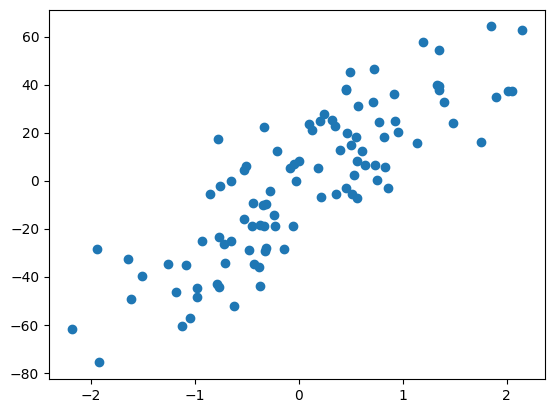

In [34]:
plt.scatter(X,y)

In [35]:
# Apply 'LinearRegression' here 

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [36]:
lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [37]:
# Now, let's try the same thing on the "Ridge_Regression"

from sklearn.linear_model import Ridge

rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

# So,by adding the value of (alpha=10),the value of slope decreases slightly from before.   

[24.9546267]
-2.1269130035235726


In [38]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

# So,by putting the value of (alpha=100),Slope decreases too much from before.   

[12.93442104]
-1.4248441496033306


In [39]:
# let's visualize the nature of the 'slope' that how they behave (on increasing 'alpha' )

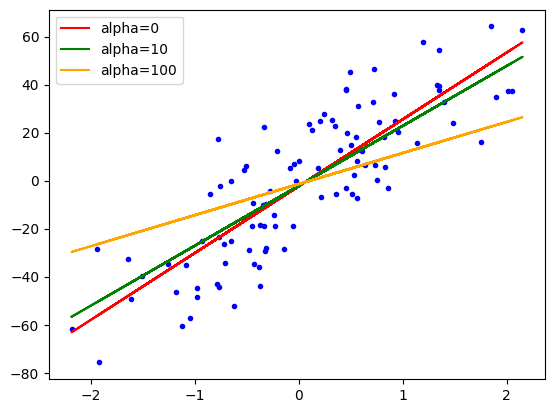

In [40]:
plt.plot(X,y,'b.')
plt.plot(X, lr.predict(X), color='red', label='alpha=0')
plt.plot(X, rr.predict(X), color='green', label='alpha=10')
plt.plot(X, rr1.predict(X), color='orange', label='alpha=100')
plt.legend()

In [41]:
# Now, we are going to create our own class :- 

In [42]:
class MeraRidge:

    def __init__(self,alpha=0.1):

        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):

        num = 0
        den = 0

        for i in range(X_train.shape[0]):

            # look at the "NOTES" for the clarification or derivation of the code 
            
            num = num + (X_train[i] - X_train.mean())*(y_train[i] - y_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())

        self.m = num / (den + self.alpha)
        self.b = y_train.mean() - (self.m * X_train.mean()) 

        print(self.m, self.b)
    
    def predict(X_test):

        pass
        

In [43]:
reg = MeraRidge(alpha=10)

reg.fit(X,y) 

# so finally, we get the same asnwer after using our class i.e., "MeraRidge" .

[24.9546267] [-2.126913]


In [44]:
# check it also for the value (alpha=100)

reg1 = MeraRidge(alpha=100)

reg1.fit(X,y)

# so here, also for (alpha=100), we get the same answer here.

[12.93442104] [-1.42484415]
